In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("NIRF_Overall_2024.csv")

In [ ]:
plt.style.use('seaborn-v0_8-dark-palette')

In [ ]:
df.head()

,Unnamed: 0,Institute ID,Name,City,State,Score,Rank
0,0,IR-O-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,86.42,1
1,1,IR-O-U-0220,"Indian Institute of Science, Bengaluru",Bengaluru,Karnataka,83.28,2
2,2,IR-O-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,81.37,3
3,3,IR-O-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,80.31,4
4,4,IR-O-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,77.56,5


In [ ]:
zones = {
 'Northern Zone': ['Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Punjab', 'Rajasthan'],
 'North Eastern Zone': ['Assam', 'Arunachal Pradesh', 'Manipur','Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura'],
 'Central Zone': ['Chhattisgarh', 'Madhya Pradesh', 'Uttarakhand', 'Uttar Pradesh'],
 'Eastern Zone': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal'],
 'Western Zone': ['Dadra and Nagar Haveli and Daman and Diu', 'Goa','Gujarat', 'Maharashtra'],
 'Southern Zone': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry','Tamil Nadu', 'Telangana', 'Andaman and Nicobar']
 }

In [ ]:
def categorize_zone(state):
  for zone, states in zones.items():
    if state in states:
      return zone
  return 'Unknown'

In [ ]:
df['Zone / Zonal Region'] = df['State'].apply(categorize_zone)

In [ ]:
df

,Unnamed: 0,Institute ID,Name,City,State,Score,Rank,Zone / Zonal Region
0,0,IR-O-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,86.42,1,Southern Zone
1,1,IR-O-U-0220,"Indian Institute of Science, Bengaluru",Bengaluru,Karnataka,83.28,2,Southern Zone
2,2,IR-O-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,81.37,3,Western Zone
3,3,IR-O-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,80.31,4,Northern Zone
4,4,IR-O-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,77.56,5,Central Zone
...,...,...,...,...,...,...,...,...
95,95,IR-O-I-1486,Sri Ramachandra Institute of Higher Education ...,Chennai,Tamil Nadu,48.10,96,Southern Zone
96,96,IR-O-U-0003,Acharya Nagarjuna University,Guntur,Andhra Pradesh,47.73,97,Southern Zone
97,97,IR-O-U-0331,Tata Institute of Social Sciences,Mumbai,Maharashtra,47.56,98,Western Zone
98,98,IR-O-U-0686,All India Institute of Medical Sciences Patna,Patna,Bihar,47.55,99,Eastern Zone


### **Q1 Among the top 5 states, which state has the highest number of ranked institutions in the NIRF rankings?**

In [ ]:
top_states = df["State"].value_counts().nlargest(5).sort_values()
top_states

,count
State,
West Bengal,6
Delhi,7
Uttar Pradesh,8
Maharashtra,11
Tamil Nadu,18


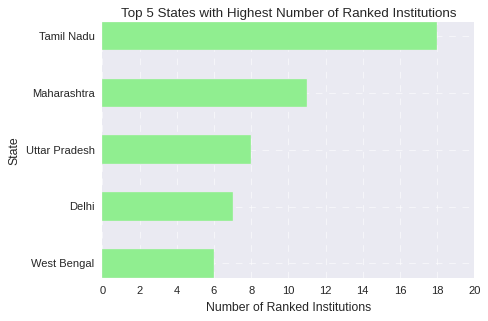

In [ ]:
plt.figure(figsize=(6, 4))
plt.barh(top_states.index ,top_states.values, color='lightgreen',height = 0.5)
plt.xlabel('Number of Ranked Institutions')
plt.ylabel('State')
plt.title('Top 5 States with Highest Number of Ranked Institutions')
plt.xticks(np.arange(0,22,step = 2))
plt.grid(axis='both', color='white', linestyle='--', linewidth=0.5)
plt.show()

### **Q2 Which states should the government focus on to improve their presence in the top 100 NIRF rankings? Identify the states that could benefit from increased investment in higher education.**

In [ ]:
all_state = df["State"].value_counts()

In [ ]:
Mapping = {'Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Punjab', 'Rajasthan','Assam', 'Arunachal Pradesh','Manipur',
 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim','Tripura','Chhattisgarh', 'Madhya Pradesh', 'Uttarakhand', 'Uttar Pradesh','Bihar', 'Jharkhand', 'Odisha', 'West Bengal',
 'Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Gujarat','Maharashtra','Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry', 'Tamil Nadu', 'Telangana', 'Andaman and Nicobar'
 }

In [ ]:
present_in_nirf = set(df["State"])
all_states = set(Mapping)
not_in_nirf = sorted(all_states - present_in_nirf)
print("States where the government should focus:")
print(", ".join(not_in_nirf))

States where the government should focus:
Andaman and Nicobar, Arunachal Pradesh, Chhattisgarh, Dadra and Nagar Haveli and Daman and Diu, Goa, Haryana, Ladakh, Manipur, Meghalaya, Mizoram, Nagaland, Puducherry, Sikkim, Tripura


### **Q3 Which zone has the highest representation in the NIRF rankings?**

In [ ]:
zone_representation = df['Zone / Zonal Region'].value_counts()
print(zone_representation)

Zone / Zonal Region
Southern Zone         35
Northern Zone         22
Central Zone          14
Western Zone          13
Eastern Zone          12
North Eastern Zone     3
Unknown                1
Name: count, dtype: int64


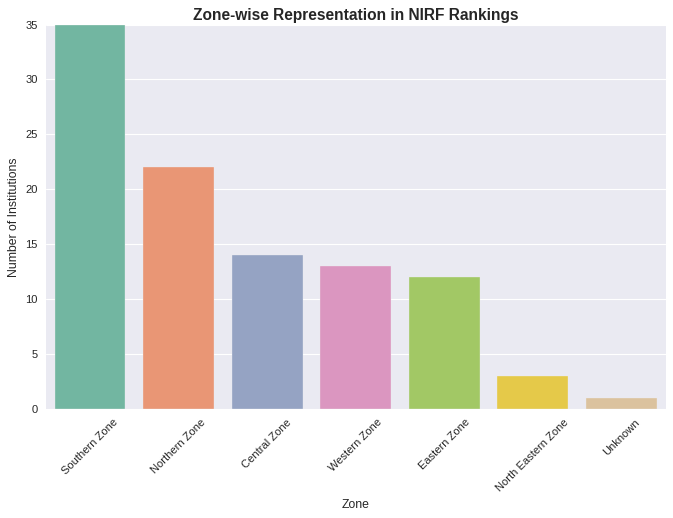

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_representation.index, y=zone_representation.values, hue=zone_representation.index, palette='Set2', legend=False)
plt.title('Zone-wise Representation in NIRF Rankings', fontsize=14, fontweight='bold')
plt.xlabel('Zone')
plt.ylabel('Number of Institutions')
plt.xticks(rotation=45)
plt.show()

### **Q4 Create two visualizations of the same data to discuss the “Lie Factor” in this context and explain how the visualization could mislead viewers.**

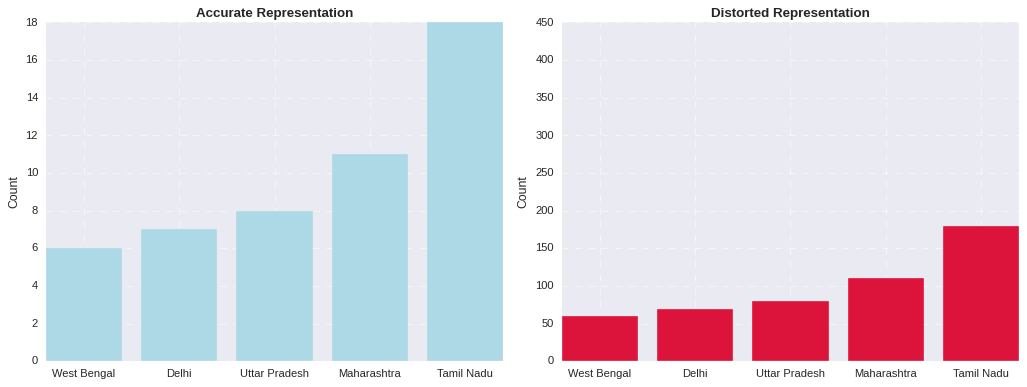

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.bar(top_states.index, top_states.values, color='lightblue', )
ax1.set_title('Accurate Representation', fontweight='bold')
ax1.set_ylabel('Count')
ax1.grid(axis='both', color='white', linestyle='--', linewidth=0.5)
# Distorted representation (Lie Factor)
distorted_values = top_states.values * 10 # Arbitrary distortion factor
ax2.bar(top_states.index, distorted_values,color='crimson')
ax2.set_title('Distorted Representation', fontweight='bold')
ax2.set_ylabel('Count')
ax2.set_ylim(0, max(distorted_values) * 2.5) # Adjust y-axis to exaggerate the difference
ax2.grid(axis='both', color='white', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## **Q5 Visualize the distribution of scores among all institutions.**

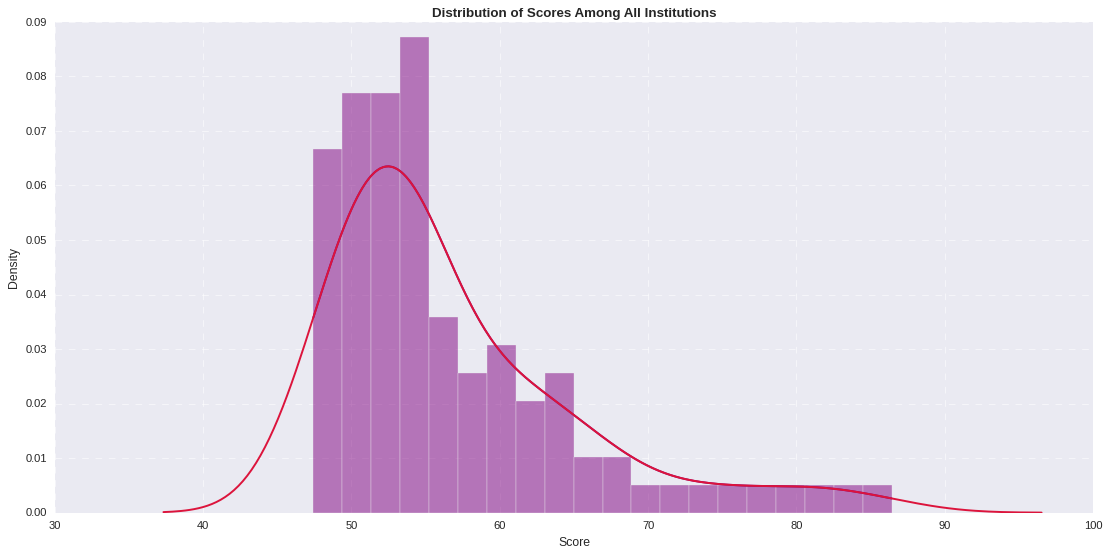

In [ ]:
sorted_scores = df['Score'].sort_values()
sns.displot(sorted_scores, bins=20, kde=True,color='purple',stat="density",height=7, aspect=2)
sns.kdeplot(sorted_scores, color='crimson')
plt.title('Distribution of Scores Among All Institutions', fontweight='bold')
plt.grid(axis='both', color='white', linestyle='--', linewidth=0.5)
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()